# Spotify Popularity Predictor
## By: Carter Mooring, and Armando Valdez

CPSC 322, Spring 2021

In [132]:
import importlib
import SpotifyAPIClient
import pprint
import csv
import os
import random
importlib.reload(SpotifyAPIClient)
from SpotifyAPIClient import SpotifyAPI

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

fname = os.path.join("data", 'track-audio-features-all.txt')
track_data = MyPyTable().load_from_file(fname)

# Introduction
We used a Spotify dataset that consisted of about 32,000 songs that we then cut down to 5,000. At frist we wanted to come up with a way to use classifiers such as Naive Bayes and Random Forest to give users song recommendations based on a certain playlist. Unfortunately after digging furhter into the whole idea of song recommendations we decided that we would not be able to the project in the given amount of time. As a result we turned to plan B which was using differnet song attributes in order to predict the popularity of a song. We found that Naive Bayes worked best with out data set, giving us a average of 44% accuracy which is very good for our classifier.  

In [106]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.format_num(track_data.get_column('danceability'))
energy = myutils.format_num(track_data.get_column('energy'))
loudness = track_data.get_column('loudness')
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = track_data.get_column('tempo')
valence = myutils.format_num(track_data.get_column('valence'))
popularity = track_data.get_column("track_popularity")


genre_bins = myutils.bin_genre(genre)
dance_bins = myutils.bin_vals(danceability)
energy_bins = myutils.bin_vals(energy)
loudness_bins = myutils.bin_loudness(loudness)
speechiness_bins = myutils.bin_vals(speechiness)
tempo_bins = myutils.bin_tempo(tempo)
valence_bins = myutils.bin_vals(valence)
popularity_bins = myutils.bin_vals(popularity)

# Data Analysis
Our data set includes a lot of different attributes for each song, 23 attrbutes to be exact. These attributes range from 'song id's' so that they could be looked up using Spotify's API to 'runtime' which denotes the duration a song last. For the purposes of our goal we stuck with 7 different attributes for our classification. Specifically we used playlist_subgenre(String), danceability(float), energy(float), loudness(float), speechiness(float), tempo(float), and valnece(float). 

1. playlist_subgenre(String): A string used to classify which type of genre a song is under

1. danceability(float): Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

1. energy(float): Energy represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

1. loudness(float): The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).

1. speechiness(float): Speechiness detects the presence of spoken words in a track.

1. tempo(float): The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

1. valnece(float): Describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.

## Data Summary

The Following 14 Charts display some of the key data visualizations that we took into account when parsing and manipulating our data to get a better all around classification for popularity. Some of the notable discoveries came in the last 6 EDA Diagrams. We noticed that when it came to Energy on average songs that would rank as a '10' in popularity had the lowest average Energy out of all other songs. Songs that ranked in the lowest popularity range on average had a higher Energy level than all other songs in our data set. This came as a surprise since we thought the more energy a song had the more popular it would be. Besides this small surprise all other averages for danceability, loudness, speechiness, tempo, and valence seem to be very close across our 10 different Popularity bins. 
    

# Figure 1 
Shows the distrbution of our 5000 songs based on subgenre. As we can see 'electropop' has the most songs in our dataset

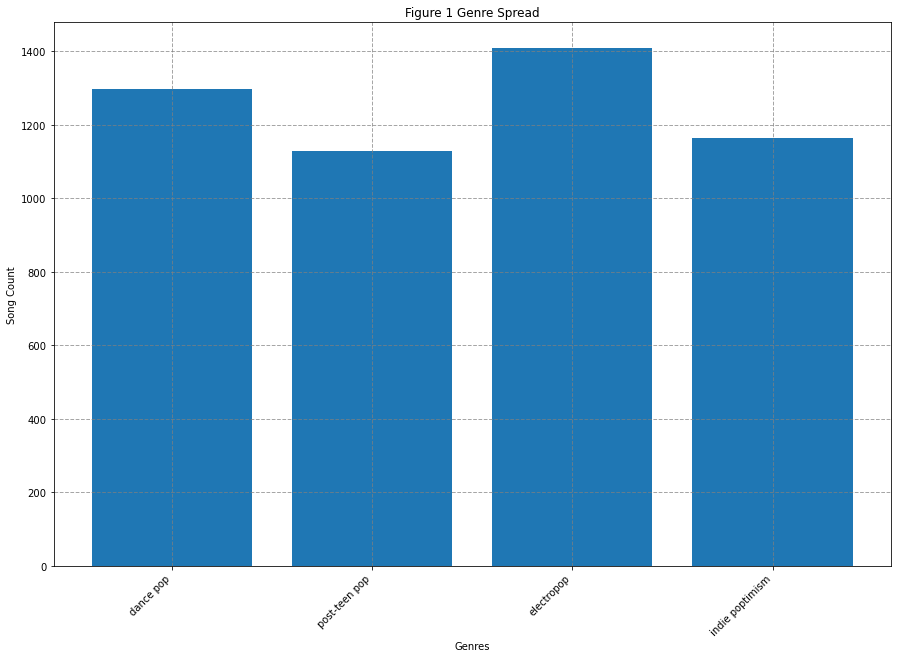

In [107]:
genre_bins_count = [[len(genre_bins[0])], [len(genre_bins[1])], [len(genre_bins[2])], [len(genre_bins[3])]]

x_vals = ['dance pop', 'post-teen pop', 'electropop', 'indie poptimism']
y_vals = []
for i in range(len(genre_bins_count)):
    y_vals.append(genre_bins_count[i][0])
plot_utils.frequency_chart(x_vals, y_vals,  "Figure 1 Genre Spread", "Genres", "Song Count")

# Figure 2 
Shows the distrbution of our 5000 songs based on Dacebaility. A majority of our songs fall between the 61-70 percent Dancebaility range.

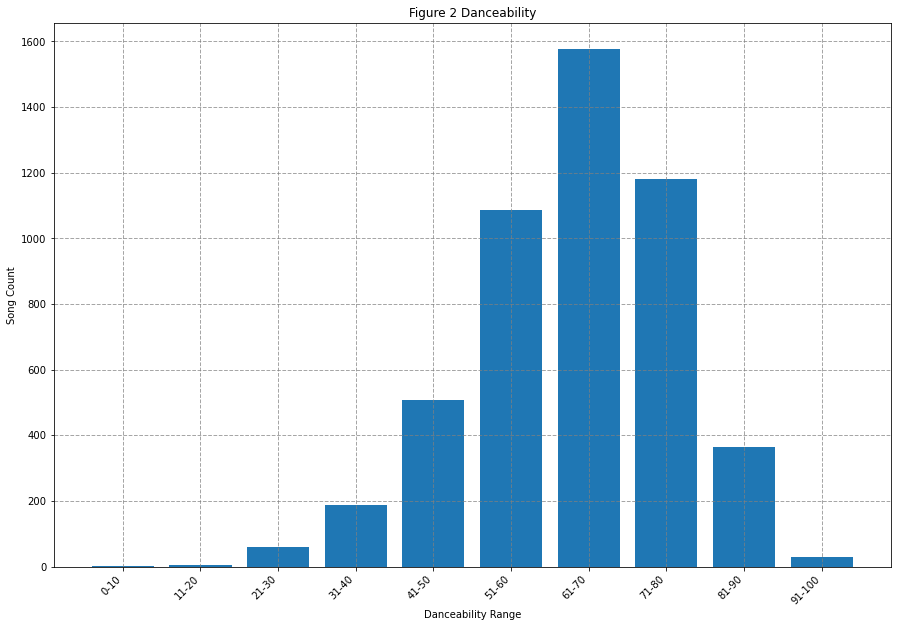

In [108]:


dance_bin_count = [[len(dance_bins[0])],[len(dance_bins[1])],[len(dance_bins[2])],[len(dance_bins[3])],[len(dance_bins[4])],[len(dance_bins[5])],[len(dance_bins[6])],[len(dance_bins[7])],[len(dance_bins[8])],[len(dance_bins[9])]]


x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(dance_bin_count)):
    y_vals.append(dance_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 2 Danceability", "Danceability Range", "Song Count")



# Figure 3
Shows the distrbution of our 5000 songs based on Energy. A majority of our songs fall between the 71-80 percent Energy range.

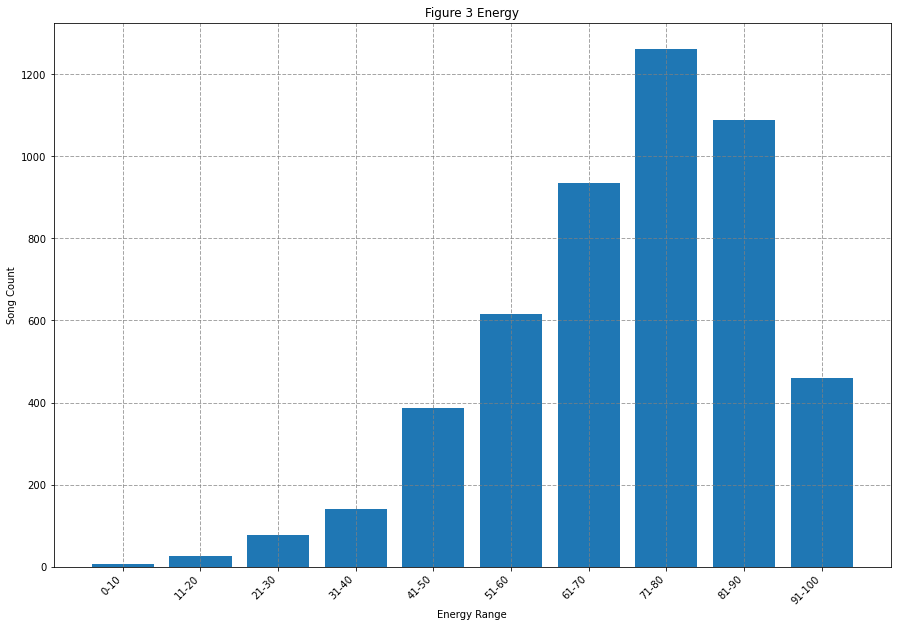

In [109]:
energy_bin_count = [[len(energy_bins[0])],[len(energy_bins[1])],[len(energy_bins[2])],[len(energy_bins[3])],[len(energy_bins[4])],[len(energy_bins[5])],[len(energy_bins[6])],[len(energy_bins[7])],[len(energy_bins[8])],[len(energy_bins[9])]]


x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(energy_bin_count)):
    y_vals.append(energy_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 3 Energy", "Energy Range", "Song Count")

# Figure 4 
Shows the distrbution of our 5000 songs based on Loudness. A majority of our songs are between 0 and -10.55. The closer the values are to 0 the louder a song is. These will be binned and given a rank in the classification to better the results.

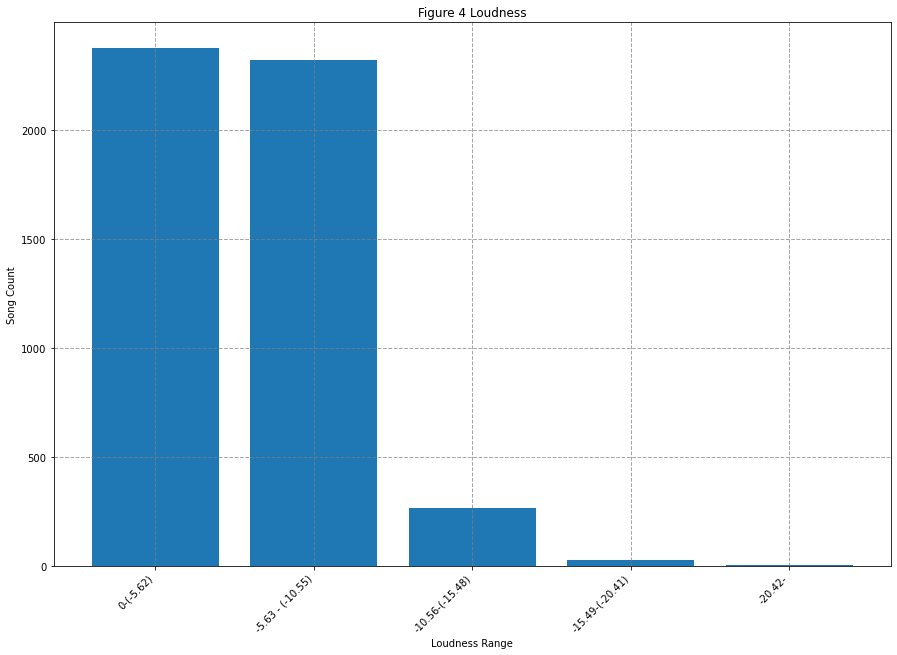

In [110]:
loudness_bin_count = [[len(loudness_bins[0])],[len(loudness_bins[1])],[len(loudness_bins[2])],[len(loudness_bins[3])],[len(loudness_bins[4])]]

x_vals = ['0-(-5.62)','-5.63 - (-10.55)','-10.56-(-15.48)','-15.49-(-20.41)','-20.42-']
y_vals = []
for i in range(len(loudness_bin_count)):
    y_vals.append(loudness_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 4 Loudness", "Loudness Range", "Song Count")

# Figure 5 
Shows the distrbution of our 5000 songs based on Speechiness. A majority of our songs fall in the 1 - 10 range since the closer a songs Speechiness is to 0 the less words are in the song as a whole meaning the song is made up of a majority of beats and sounds.

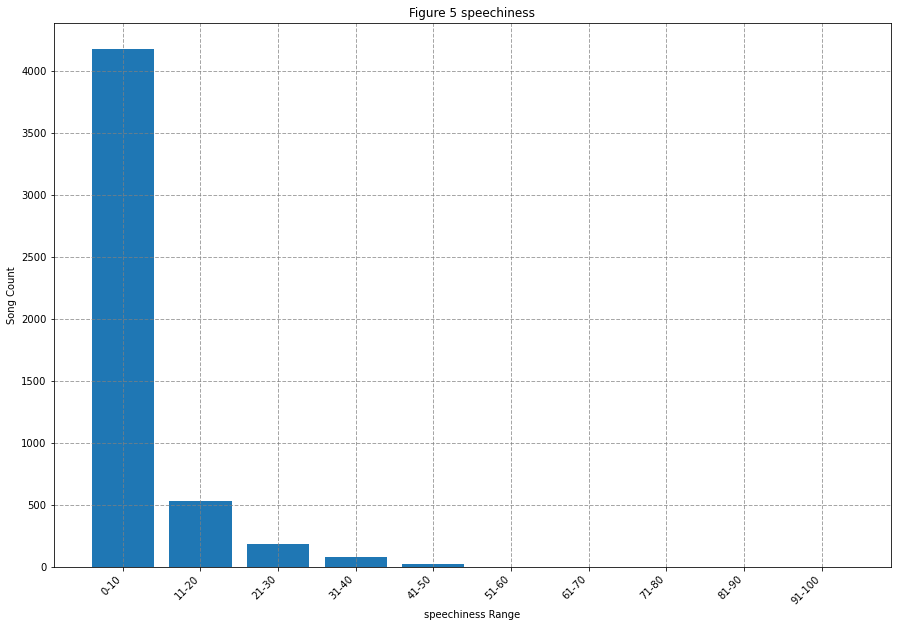

In [111]:
speechiness_bin_count = [[len(speechiness_bins[0])],[len(speechiness_bins[1])],[len(speechiness_bins[2])],[len(speechiness_bins[3])],[len(speechiness_bins[4])],[len(speechiness_bins[5])],[len(speechiness_bins[6])],[len(speechiness_bins[7])],[len(speechiness_bins[8])],[len(speechiness_bins[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(speechiness_bin_count)):
    y_vals.append(speechiness_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 5 speechiness", "speechiness Range", "Song Count")

# Figure 6
Shows the distrbution of our 5000 songs based on Tempo. A majority of our songs fall within the middle average Tempo range. These values will also be bined much like the Loudness values to better the classification results.

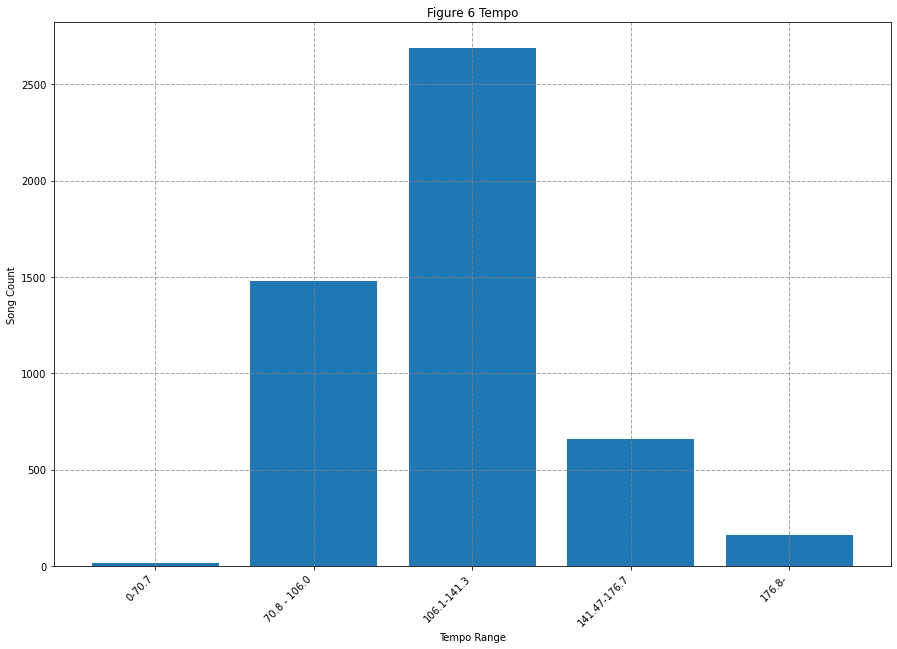

In [112]:
tempo_bin_count = [[len(tempo_bins[0])],[len(tempo_bins[1])],[len(tempo_bins[2])],[len(tempo_bins[3])],[len(tempo_bins[4])]]

x_vals = ['0-70.7','70.8 - 106.0','106.1-141.3','141.47-176.7','176.8-']
y_vals = []
for i in range(len(tempo_bin_count)):
    y_vals.append(tempo_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 6 Tempo", "Tempo Range", "Song Count")

 # Figure 7
 Shows the distrbution of our 5000 songs based on Valence. A majority of our songs fall in the 41 - 60 range.

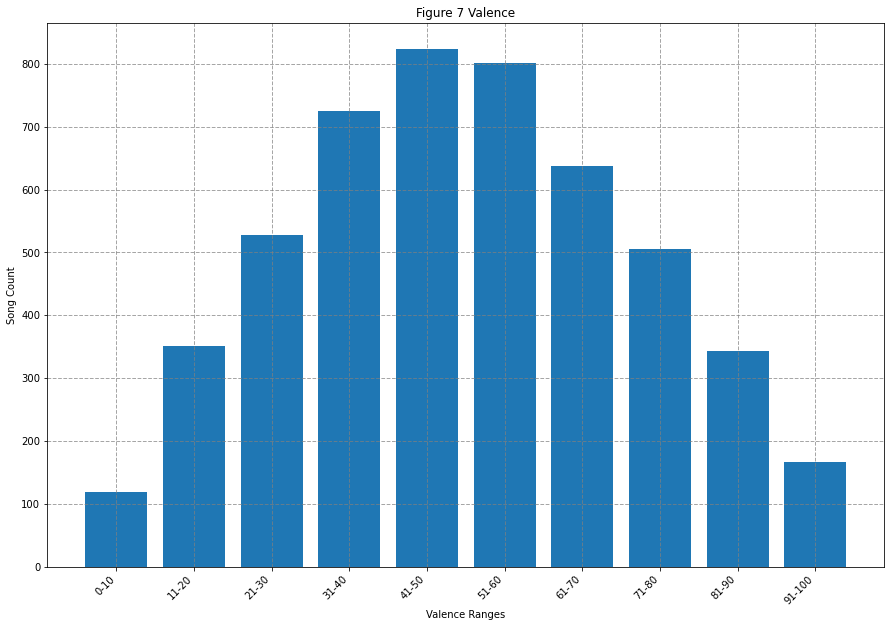

In [113]:
valence_bin_count = [[len(valence_bins[0])],[len(valence_bins[1])],[len(valence_bins[2])],[len(valence_bins[3])],[len(valence_bins[4])],[len(valence_bins[5])],[len(valence_bins[6])],[len(valence_bins[7])],[len(valence_bins[8])],[len(valence_bins[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(valence_bin_count)):
    y_vals.append(valence_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 7 Valence", "Valence Ranges", "Song Count")

# Figure 8
Shows the distrbution of our 5000 songs based on Popularity. A majority of our songs fall in the 61 - 70 range. The fact that there are not that many songs in the 91-100 range could be that there werent many in our dataset to begin with or that having a rank '10' song is quite hard to achieve.

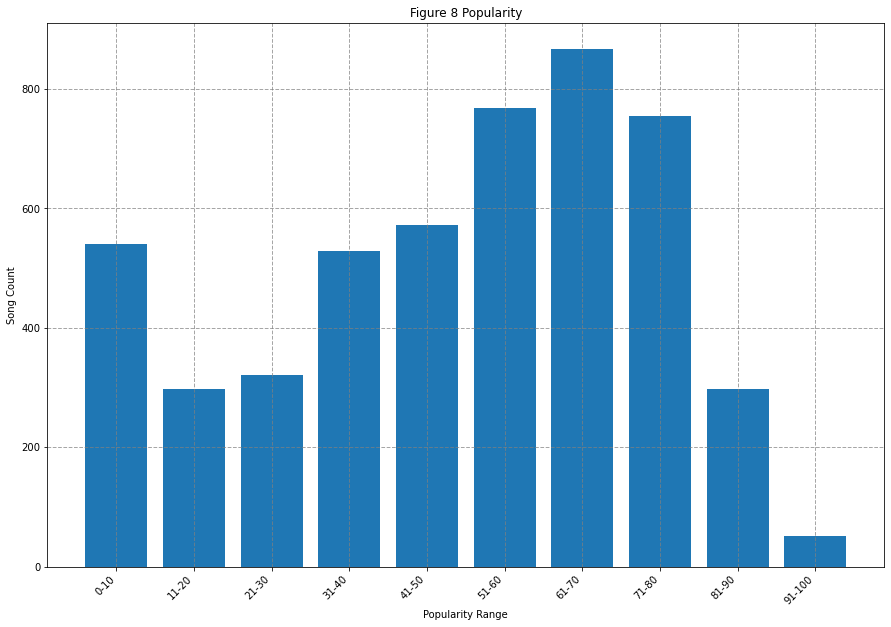

In [114]:
popularity_bin_count = [[len(popularity_bins[0])],[len(popularity_bins[1])],[len(popularity_bins[2])],[len(popularity_bins[3])],[len(popularity_bins[4])],[len(popularity_bins[5])],[len(popularity_bins[6])],[len(popularity_bins[7])],[len(popularity_bins[8])],[len(popularity_bins[9])]]


x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(popularity_bin_count)):
    y_vals.append(popularity_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 8 Popularity", "Popularity Range", "Song Count")

# Figure 9
Shows the average Daceability for each Popularity bin 

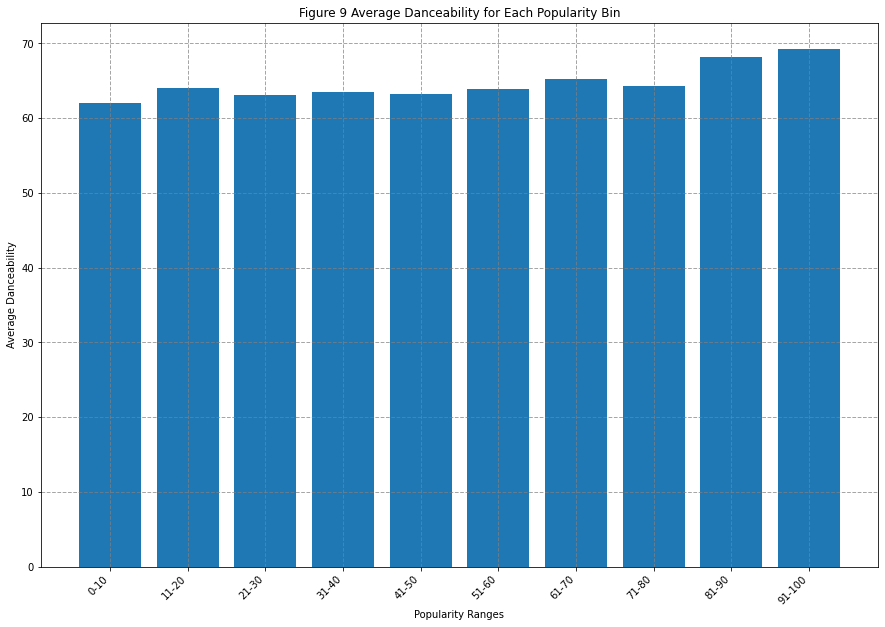

In [115]:
data = myutils.get_popularity_avg(track_data, 11)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 9 Average Danceability for Each Popularity Bin", "Popularity Ranges", "Average Danceability")

# Figure 10
Shows the average Energy for each Popularity bin 

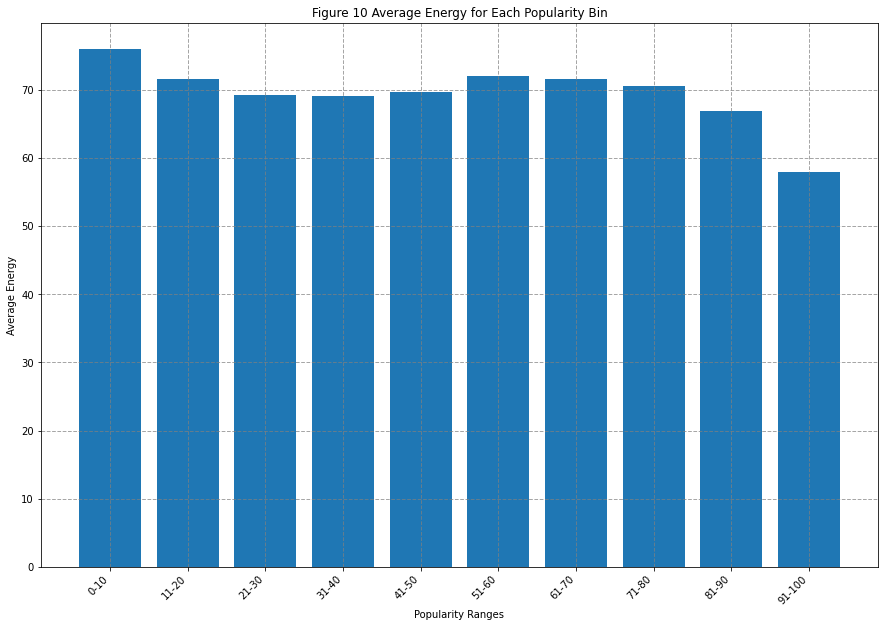

In [116]:
data = myutils.get_popularity_avg(track_data, 12)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 10 Average Energy for Each Popularity Bin", "Popularity Ranges", "Average Energy")

# Figure 11
Shows the average Loudness for each Popularity bin. These values range from 0 - (-7). As a songs Loudness increases its Loudness value gets closer to 0, 0 being the loudest possible value for a song.

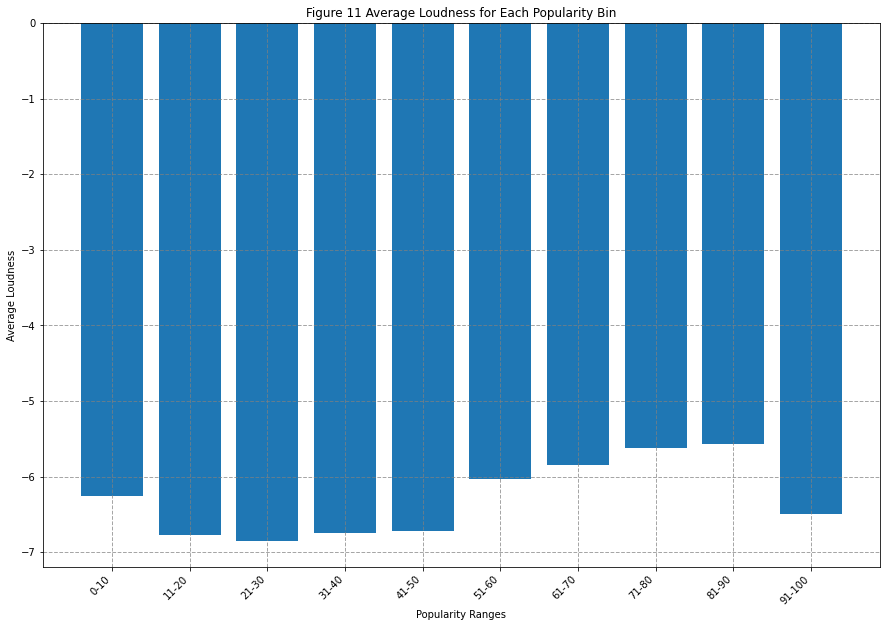

In [117]:
data = myutils.get_popularity_avg(track_data, 14)
data_avg = [[myutils.compute_average(data[0])],[myutils.compute_average(data[1])],[myutils.compute_average(data[2])],[myutils.compute_average(data[3])],[myutils.compute_average(data[4])],[myutils.compute_average(data[5])],[myutils.compute_average(data[6])],[myutils.compute_average(data[7])],[myutils.compute_average(data[8])],[myutils.compute_average(data[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 11 Average Loudness for Each Popularity Bin", "Popularity Ranges", "Average Loudness")

# Figure 12
Shows the average Speechiness for each Popularity bin. Based on the graph the most popular songs tend to have an average of more words in them than other songs.

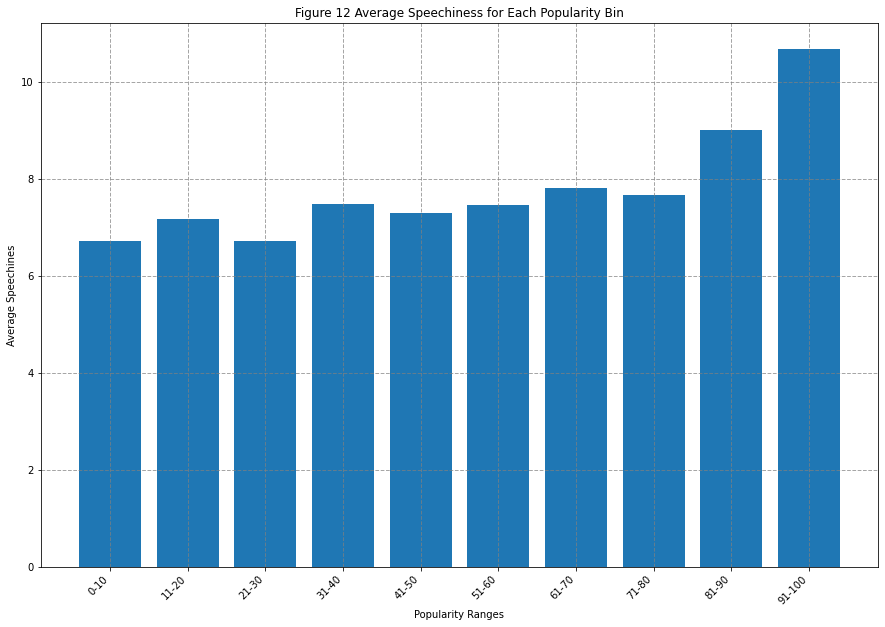

In [118]:
data = myutils.get_popularity_avg(track_data, 16)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 12 Average Speechiness for Each Popularity Bin", "Popularity Ranges", "Average Speechines")

# Figure 13
Shows the average Tempo for each Popularity bin 

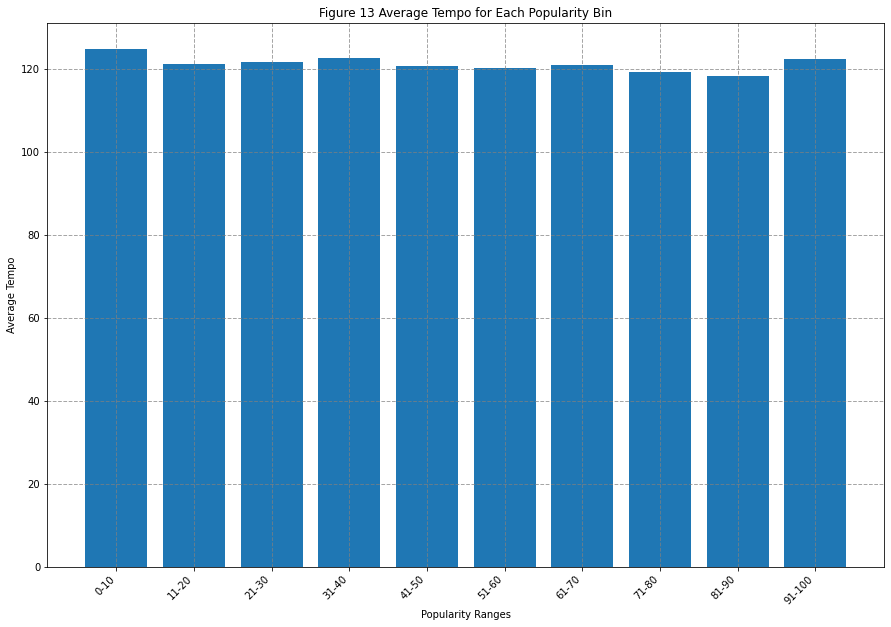

In [119]:
data = myutils.get_popularity_avg(track_data, 21)
data_avg = [[myutils.compute_average(data[0])],[myutils.compute_average(data[1])],[myutils.compute_average(data[2])],[myutils.compute_average(data[3])],[myutils.compute_average(data[4])],[myutils.compute_average(data[5])],[myutils.compute_average(data[6])],[myutils.compute_average(data[7])],[myutils.compute_average(data[8])],[myutils.compute_average(data[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 13 Average Tempo for Each Popularity Bin", "Popularity Ranges", "Average Tempo")

# Figure 14
Shows the average Valence for each Popularity bin

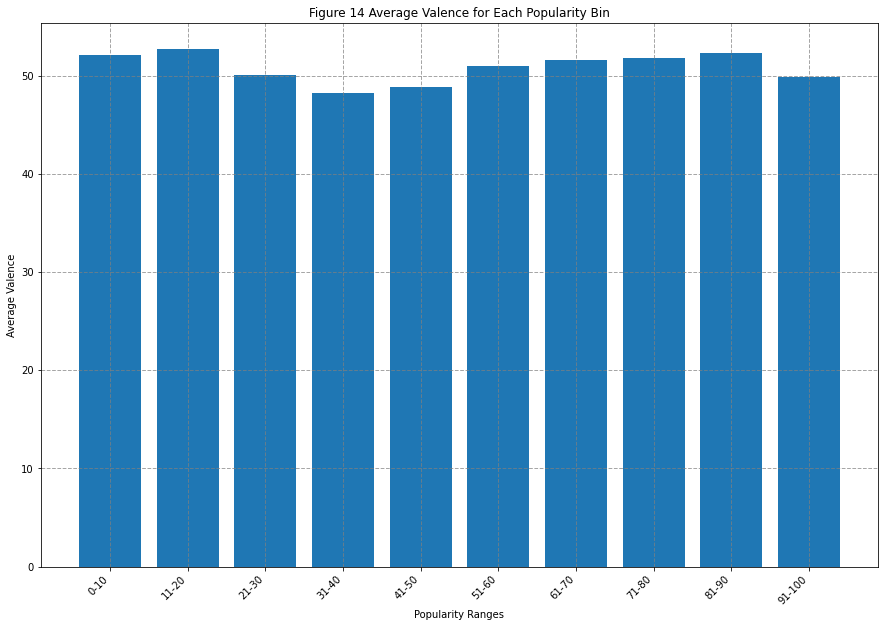

In [120]:
data = myutils.get_popularity_avg(track_data, 20)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Figure 14 Average Valence for Each Popularity Bin", "Popularity Ranges", "Average Valence")

## Classification Results
For classification we 

In [133]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.convert_to_rank(myutils.format_num(track_data.get_column('danceability')))
energy = myutils.convert_to_rank(myutils.format_num(track_data.get_column('energy')))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.convert_to_rank(myutils.format_num(track_data.get_column('valence')))

x_vals = [[genre[i], danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))

print('Stratified 10-Fold Cross Validation\n')
strat_train_folds, strat_test_folds = myevaluation.stratified_kfold_cross_validation(x_vals, y_vals, 10)
strat_xtrain, strat_ytrain, strat_xtest, strat_ytest = myutils.get_from_folds(x_vals, y_vals, strat_train_folds, strat_test_folds)

myNb = MyNaiveBayesClassifier()
myNb.fit(strat_xtrain, strat_ytrain)

predicted = myNb.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('Nive Bayes: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

Stratified 10-Fold Cross Validation

Nive Bayes: Accuracy = 44.58 Error Rate =  55.42


In [122]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.convert_to_rank(myutils.format_num(track_data.get_column('danceability')))
energy = myutils.convert_to_rank(myutils.format_num(track_data.get_column('energy')))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.convert_to_rank(myutils.format_num(track_data.get_column('valence')))

x_vals = [[genre[i], danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))

strat_train_folds2, strat_test_folds2 = myevaluation.stratified_kfold_cross_validation(x_vals, y_vals, 10)
strat_xtrain2, strat_ytrain2, strat_xtest2, strat_ytest2 = myutils.get_from_folds(x_vals, y_vals, strat_train_folds2, strat_test_folds2)

my_tree = MyDecisionTreeClassifier()
my_tree.fit(strat_xtrain2, strat_ytrain2)

predicted2 = my_tree.predict(strat_xtest2)
accuracy2 = myutils.get_accuracy(strat_ytest2, predicted2)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

My Decision Tree: Accuracy = 16.66 Error Rate =  83.34


In [123]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.convert_to_rank(myutils.format_num(track_data.get_column('danceability')))
energy = myutils.convert_to_rank(myutils.format_num(track_data.get_column('energy')))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.convert_to_rank(myutils.format_num(track_data.get_column('valence')))

x_vals = [[genre[i], danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))

strat_train_folds2, strat_test_folds2 = myevaluation.stratified_kfold_cross_validation(x_vals, y_vals, 10)
strat_xtrain2, strat_ytrain2, strat_xtest2, strat_ytest2 = myutils.get_from_folds(x_vals, y_vals, strat_train_folds2, strat_test_folds2)


rand_forest = MyRandomForestClassifier()
rand_forest.fit(strat_xtrain2, strat_ytrain2)
predicted2 = rand_forest.predict(strat_xtest2)
accuracy2 = myutils.get_accuracy(strat_ytest2, predicted2)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

My Decision Tree: Accuracy = 25.08 Error Rate =  74.92


In [124]:
rand_forest = MyRandomForestClassifier(3, 7, 2)
rand_forest.fit(strat_xtrain2, strat_ytrain2)
predicted2 = rand_forest.predict(strat_xtest2)
accuracy2 = myutils.get_accuracy(strat_ytest2, predicted2)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

My Decision Tree: Accuracy = 15.36 Error Rate =  84.64


In [125]:
rand_forest = MyRandomForestClassifier(4, 10, 5)
rand_forest.fit(strat_xtrain2, strat_ytrain2)
predicted2 = rand_forest.predict(strat_xtest2)
accuracy2 = myutils.get_accuracy(strat_ytest2, predicted2)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

My Decision Tree: Accuracy = 15.78 Error Rate =  84.22


In [126]:
rand_forest = MyRandomForestClassifier(5, 30, 2)
rand_forest.fit(strat_xtrain2, strat_ytrain2)
predicted2 = rand_forest.predict(strat_xtest2)
accuracy2 = myutils.get_accuracy(strat_ytest2, predicted2)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

My Decision Tree: Accuracy = 25.74 Error Rate =  74.26


In [127]:
rand_forest = MyRandomForestClassifier(6, 60, 2)
rand_forest.fit(strat_xtrain2, strat_ytrain2)
predicted2 = rand_forest.predict(strat_xtest2)
accuracy2 = myutils.get_accuracy(strat_ytest2, predicted2)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

My Decision Tree: Accuracy = 17.34 Error Rate =  82.66
